In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd


## Interpolação usando o scipy.interpolate
### a), b), c), d)

In [149]:
data = np.loadtxt(r"C:\Users\ylana\Downloads\scattering.data")

In [3]:
len(data)

9

In [4]:
def inter(pot, lim1, lim2):
    f1 = interp1d(pot['y'], pot['x'], kind='cubic', fill_value="extrapolate")
    y_new1 = np.linspace(lim1, lim2, 100) 
    x_vdd1 = f1(y_new1)
    return x_vdd1, y_new1

In [5]:
x = np.linspace(0, 200, 9)

In [6]:
len(x)

9

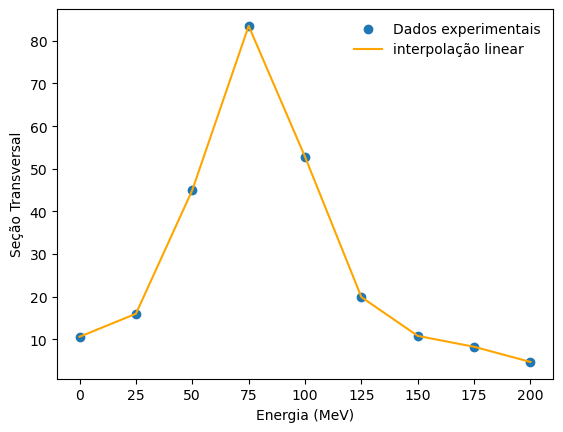

In [7]:
plt.scatter(x, data[:,1], label = "Dados experimentais")
plt.plot(x, data[:,1], c = 'orange', label = "interpolação linear")
plt.xlabel("Energia (MeV)")
plt.ylabel("Seção Transversal")


plt.legend(frameon = False)

In [8]:
def inter(xd, yd):
    f1 = interp1d(xd, yd, kind='cubic', fill_value="extrapolate")
    x_new1 = np.linspace(0, max(xd), 100) 
    y_vdd1 = f1(x_new1)
    return x_new1, y_vdd1

In [9]:
f1 = interp1d(x, data[:,1], kind='cubic')
x_new = np.linspace(0,200, 100)
y_new = f1(x_new)


x_novo, y_novo = inter(x, data[:,1])

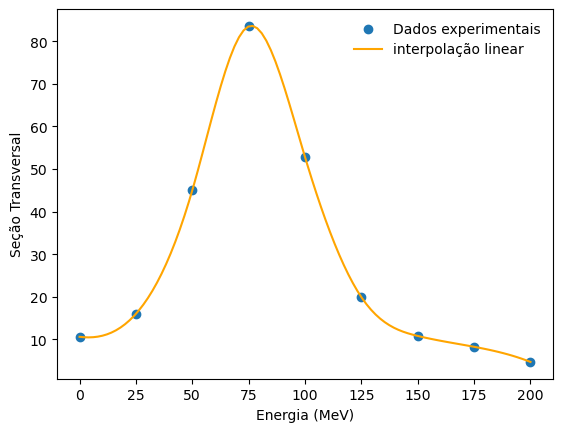

In [10]:
plt.scatter(x, data[:,1], label = "Dados experimentais")
plt.plot(x_novo, y_novo, c = 'orange', label = "interpolação linear")
plt.xlabel("Energia (MeV)")
plt.ylabel("Seção Transversal")

plt.legend(frameon = False)

## Interpolação linear
### a), b)

In [33]:
a = int(data[0,0])
b= int(data[1,0])

fa = data[0,1]
fb = data[1,1]

x = np.linspace(a, b, 10)

valor = (fa*(b - x) + fb*(x-a))/(b-a)

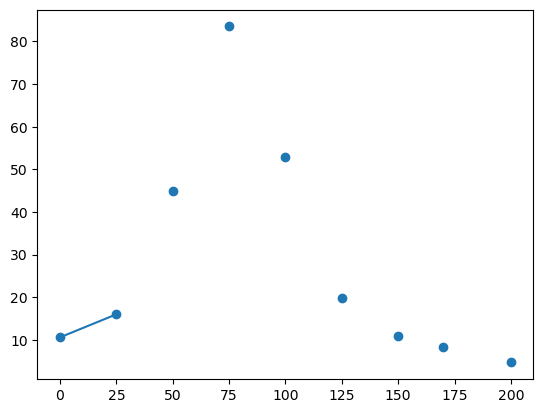

In [34]:
plt.scatter(data[:,0], data[:,1])

plt.plot(x,valor, color = 'orange')

In [41]:
def f(data):
    x_values = []
    y_values = []

    for i in range(len(data)-1):
        a = data[i,0]
        b = data[i+1, 0]
        fa = data[i,1]
        fb = data[i+1,1]
        
        x = np.linspace(a, b, 10) 
        func = (fa*(b - x) + fb*(x-a))/(b-a)
        
        y_values.extend(func)
        x_values.extend(x)
    

    return x_values, y_values

In [36]:
range(len(data)-1)

range(0, 8)

In [42]:
x, y = f(data)

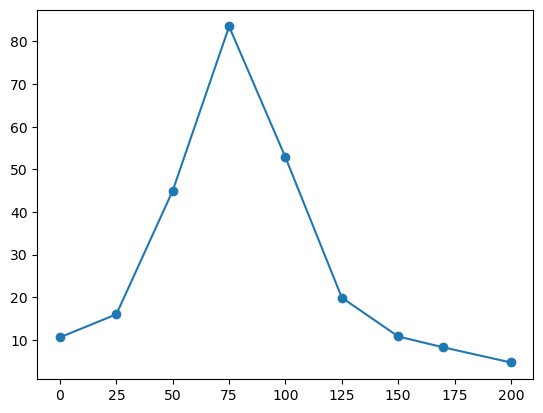

In [48]:
plt.plot(x,y, color = 'orange')
#plt.scatter(x,y, s = 2, marker='x')

plt.scatter(data[:,0], data[:,1])


### Polinômio interpolador de Lagrange
### a), b)

In [124]:
def lagrange(data):
    g = 0
    t = np.linspace(0,max(data[:,0]))
    x = data[:,0]
    y = data[:,1]
    for i in range(len(data)):
        gam = 1
        for j in range(len(data)):
            if j != i:
                gam = gam*((t-x[j])/(x[i]-x[j]))
        g += y[i]*gam
    return t, g

In [125]:
x_val, y_val = lagrange(data)

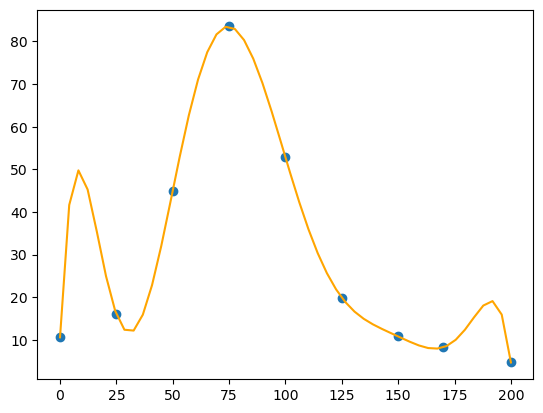

In [126]:
plt.plot(x_val,y_val, c = 'orange')
plt.scatter(data[:,0], data[:,1])

### c)

In [105]:
x = data[:,0]
y = data[:,1]

In [159]:
int(x[8])

200

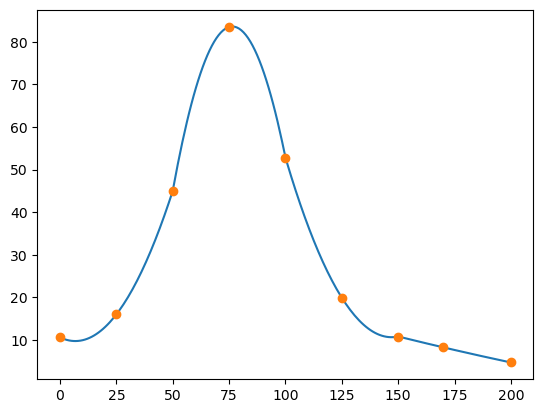

In [171]:
t = np.linspace(0,200,200)

def fg2(t):
    g = 0
    if(t<=50):
        for i in range(3):
            gamma = 1
            for j in range(3):
                if j != i:
                    gamma = gamma*((t-x[j])/(x[i]-x[j]))
            g += y[i]*gamma
            
    if t>50 and t<=100 :
        for i in range(2,5):
            gamma = 1
            for j in range(2,5):
                if j != i:
                    gamma = gamma*((t-x[j])/(x[i]-x[j]))
            g += y[i]*gamma
            
    if t>100 and t<=150 :
        for i in range(4,7):
            gamma = 1
            for j in range(4,7):
                if j != i:
                    gamma = gamma*((t-x[j])/(x[i]-x[j]))
            g += y[i]*gamma
            
    if t>150 and t<=200 :
        for i in range(6,9):
            gamma = 1
            for j in range(6,9):
                if j != i:
                    gamma = gamma*((t-x[j])/(x[i]-x[j]))
            g += y[i]*gamma
            
    return g

v = []
for i in range(200):
    v.append(fg2(t[i]))
plt.plot(t,v)
plt.plot(x, y, 'o')

In [174]:
t = np.linspace(0,int(max(data[:,0])),int(max(data[:,0])))
max(t)


200.0

Tentativa de generalizar essa função

In [ ]:
def lagrange_2(data):
    x = data[:, 0]
    y = data[:, 1]
    
    g_values = []  
    t_values = []  
    a1 = 0
    a = 50
    passo = int(max(data[:, 0]) / 4) 

    while a <= int(max(data[:, 0])): 
        t = np.linspace(a1, a, 100)  
        for ti in t:
            g = 0  
            c_range = 3  
            c_range1 = 0 

            for i in range(c_range1, c_range):
                gamma = 1  
                for j in range(c_range1, c_range):
                    if j != i:
                        gamma *= (ti - x[j]) / (x[i] - x[j]) 
                g += y[i] * gamma 

            g_values.append(g)  
            t_values.append(ti)
        
        a1 = a
        a += passo 

        c_range += 2
        c_range1 = c_range - 1  

    return np.array(t_values), np.array(g_values)


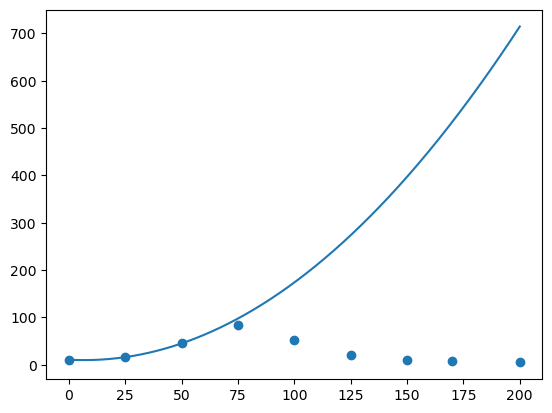

In [153]:
t, g = lagrange_2(data)

plt.plot(t, g)
plt.scatter(data[:, 0], data[:, 1])
plt.show()